In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import euclidean

In [23]:
df = pd.read_csv("./data/processed_data.csv", index_col = 0)
features = ['Acceleration','SprintSpeed','Agility','Stamina','Aggression']


In [24]:
## 사용자 정보 입력
player = {
    'Name' : 'Yang',
    'Position' : 'FW',
    'Acceleration' : 70,
    'SprintSpeed' : 80,
    'Agility' : 50,
    'Stamina' : 90,
    'Aggression' : 80

}
features = ['Acceleration', 'SprintSpeed', 'Agility', 'Stamina', 'Aggression']
# df.loc[0] = player

# df[features] = df[features].astype(float)
player = pd.DataFrame(player, index=[-1])
player

,Name,Position,Acceleration,SprintSpeed,Agility,Stamina,Aggression
-1,Yang,FW,70,80,50,90,80


In [25]:
df = pd.concat([player, df])
df['Total'] = df[features].sum(axis = 1)
df = df.reset_index(drop=True)
df

,Name,Position,Acceleration,SprintSpeed,Agility,Stamina,Aggression,Total
0,Yang,FW,70.0,80.0,50.0,90.0,80.0,370.0
1,Bruno Fernandes,CAM,77.0,73.0,80.0,91.0,78.0,399.0
2,L. Goretzka,LDM,78.0,83.0,76.0,88.0,81.0,406.0
3,L. Suárez,RS,76.0,69.0,75.0,78.0,87.0,385.0
4,K. De Bruyne,RCM,76.0,76.0,79.0,89.0,76.0,396.0
...,...,...,...,...,...,...,...,...
16647,B. Voll,RES,24.0,25.0,27.0,21.0,21.0,118.0
16648,18 L. Clayton,RES,15.0,21.0,34.0,26.0,16.0,112.0
16649,�. Dobre,RES,16.0,22.0,30.0,24.0,18.0,110.0
16650,21 Xue Qinghao,RES,22.0,17.0,36.0,20.0,13.0,108.0


In [26]:
def plot_radar_chart(player_data, player_name):
  stats = player_data.drop(['Name', 'Position', 'Total',
                              ]).values
  labels = player_data.drop(['Name', 'Position', 'Total',
                               ]).keys()
  angles = [n / float(len(labels)) * 2 * 3.141592 for n in range(len(labels))]
  angles += angles[:1]

  stats = list(stats)
  stats += stats[:1]

  plt.figure(figsize=(8, 8))
  ax = plt.subplot(111, polar=True)

  # 간격과 최대 값 설정
  plt.yticks(range(0, 101, 10), color="grey", size=8)
  plt.ylim(0, 100)

  ax.plot(angles, stats, 'o-', linewidth=2)
  ax.fill(angles, stats, alpha=0.25)

  plt.xticks(angles[:-1], labels)
  plt.title(f"{player_name}")

  plt.show()

In [27]:
target1 = 'Yang'
target2 = 'K. De Bruyne'

In [30]:
player1_stats = df[df['Name'] == target1].iloc[0]
player2_stats = df[df['Name'] == target2].iloc[0]

player1_stats

Name             Yang
Position           FW
Acceleration     70.0
SprintSpeed      80.0
Agility          50.0
Stamina          90.0
Aggression       80.0
Total           370.0
Name: 0, dtype: object

{'Name': 'Yang',
 'Position': 'FW',
 'Acceleration': 70,
 'SprintSpeed': 80,
 'Agility': 50,
 'Stamina': 90,
 'Aggression': 80}

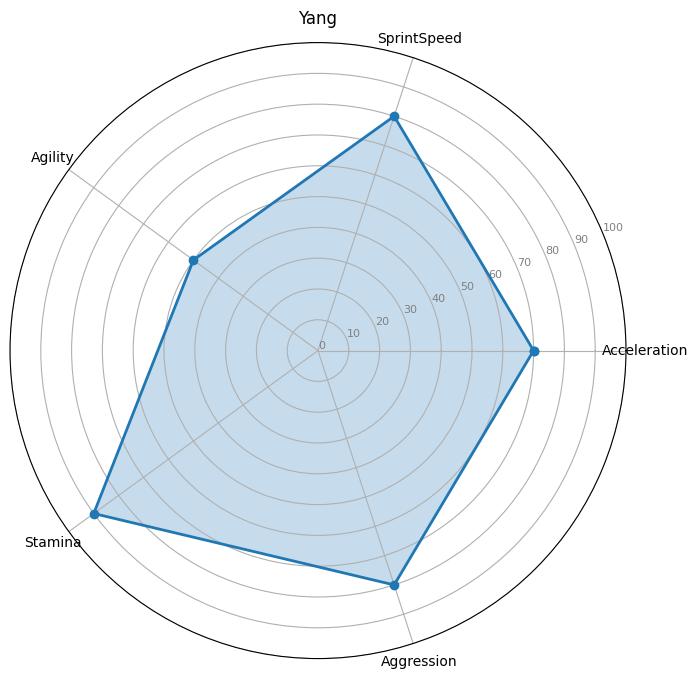

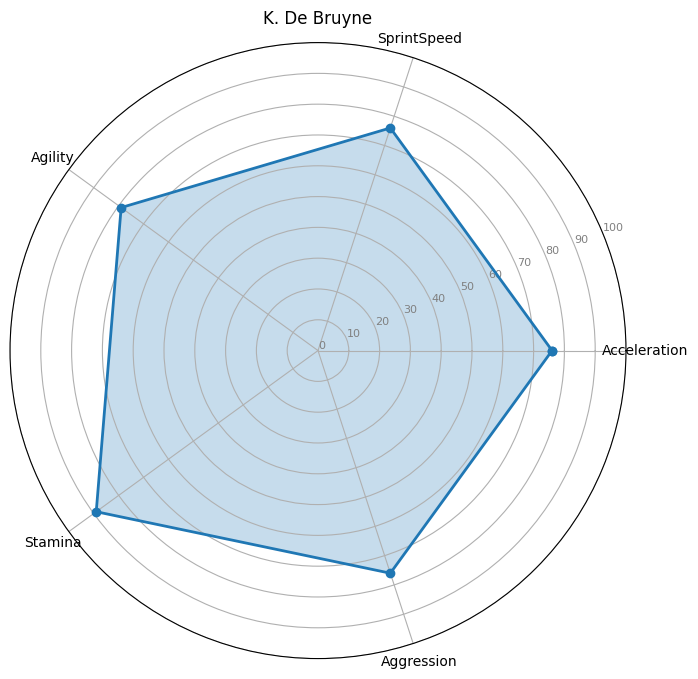

In [31]:
plot_radar_chart(player1_stats, target1)
plot_radar_chart(player2_stats, target2)

KeyError: "['Name', 'Position', 'Total'] not found in axis"

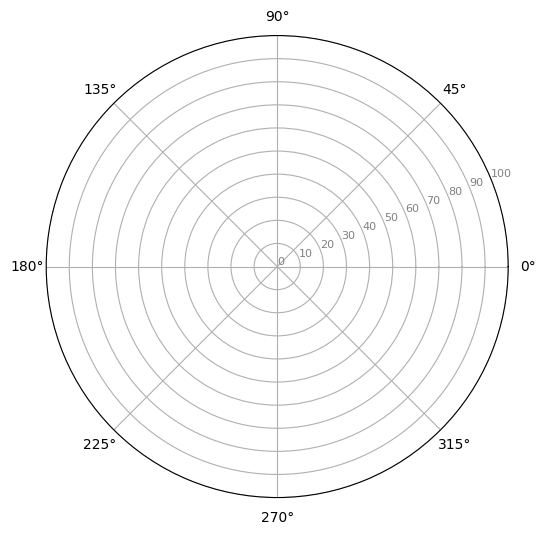

In [21]:
def plot_radar_chart2(player_data, player_name, ax, color):
    stats = player_data.drop(['Name','Position','Total']).values
    labels = player_data.drop(['Name','Position','Total']).keys()
    angles = [n / float(len(labels)) * 2 * 3.141592 for n in range(len(labels))]
    angles += angles[:1]

    stats = list(stats)
    stats += stats[:1]

    ax.plot(angles, stats, 'o-', linewidth=2, label=player_name, color=color)
    ax.fill(angles, stats, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(player_name)

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))

# 간격과 최대 값 설정
ax.set_yticks(range(0, 101, 10))
ax.set_yticklabels(["0", "10", "20", "30", "40", "50", "60", "70", "80", "90", "100"], color="grey", size=8)
ax.set_ylim(0, 100)

# 레이더 차트 생성
plot_radar_chart2(player1_stats, target1, ax, color='b')
plot_radar_chart2(player2_stats, target2, ax, color='r')

ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title(f"{target1} vs {target2}")

plt.show()

In [20]:
Percent = int((player1_stats.Total / player2_stats.Total) * 100)
Percent

121